EVALUACIÓN FINAL: PREDICCIÓN DE NATALIDAD SEGÚN FACTORES SOCIOECONÓMICOS Eres parte de un equipo de investigación en demografía y te han solicitado desarrollar un modelo basado en redes neuronales para predecir la tasa de natalidad en distintos países. Para ello, contarás con un dataset que incluye información socioeconómica como el PIB per cápita, el acceso a servicios de salud, la tasa de educación y otros factores relevantes. Tu objetivo es diseñar, entrenar y evaluar una red neuronal que permita predecir la tasa de natalidad de manera precisa, analizando el impacto de diferentes variables en la predicción. OBJETIVOS DE LA EVALUACIÓN 1. Diseñar y entrenar una red neuronal para resolver un problema de regresión. 2. Aplicar conocimientos sobre funciones de activación, optimizadores, y estrategias para prevenir sobreajuste. 3. Evaluar y comparar los resultados obtenidos con diferentes configuraciones de la red. 4. Analizar la influencia de cada variable en la predicción y extraer conclusiones sobre patrones socioeconómicos globales.

1. Carga y exploración de datos (1 punto)
* Carga el dataset proporcionado, que contiene información de distintos países sobre:
    * PIB per cápita o Acceso a servicios de salud (% de la población)
    * Nivel educativo promedio o Tasa de empleo femenino
    * Edad promedio de maternidad o Índice de urbanización
    * Tasa de natalidad (variable objetivo)
* Analiza las correlaciones entre variables y visualiza su distribución.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from google.colab import files
files.upload()

Saving dataset_natalidad.csv to dataset_natalidad.csv


{'dataset_natalidad.csv': b'Pa\xc3\xads,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad\nPa\xc3\xads_1,25599.706536604936,51.57145928433671,14.630474692314316,32.58408605843039,21.54685803253899,71.88970284118471,38.61340924506884\nPa\xc3\xads_2,57289.28685254539,81.82052056318902,6.262099474925733,56.567731578407404,33.5382936001935,62.165781980647225,19.211763820598335\nPa\xc3\xads_3,45259.66679962728,65.71779905381634,7.424430711419206,57.031756080505325,27.578785586717856,48.571656977179664,26.55689087697902\nPa\xc3\xads_4,37926.216630837014,75.42853455823514,18.478312827906187,61.87149507491033,32.39686199161612,78.82770118241692,29.17717193953724\nPa\xc3\xads_5,13581.02522433401,95.37832369630465,14.09643589489385,66.30456668613309,24.800744015459177,71.08387035323275,40.0\nPa\xc3\xads_6,13579.698618491146,62.464611457443745,5.137955774249445,78.79260397312673,33.432848427443005,39.75701636069348,38.38724762903176\nPa\x

In [2]:
df = pd.read_csv('dataset_natalidad.csv')
display(df.head())
df.info()
df.describe()

,País,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
0,País_1,25599.706537,51.571459,14.630475,32.584086,21.546858,71.889703,38.613409
1,País_2,57289.286853,81.820521,6.262099,56.567732,33.538294,62.165782,19.211764
2,País_3,45259.666800,65.717799,7.424431,57.031756,27.578786,48.571657,26.556891
3,País_4,37926.216631,75.428535,18.478313,61.871495,32.396862,78.827701,29.177172
4,País_5,13581.025224,95.378324,14.096436,66.304567,24.800744,71.083870,40.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  100 non-null    object 
 1   PIB_per_capita        100 non-null    float64
 2   Acceso_Salud          100 non-null    float64
 3   Nivel_Educativo       100 non-null    float64
 4   Tasa_Empleo_Femenino  100 non-null    float64
 5   Edad_Maternidad       100 non-null    float64
 6   Urbanizacion          100 non-null    float64
 7   Tasa_Natalidad        100 non-null    float64
dtypes: float64(7), object(1)
memory usage: 6.4+ KB


,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,30859.940886,74.891586,12.764020,54.557447,27.740687,61.517985,32.547017
std,16361.917606,14.655563,4.401394,14.672611,4.779013,17.827325,7.379215
min,5303.716442,50.347607,5.075924,30.719674,20.162565,30.872680,13.057745
25%,15626.041838,62.100226,9.153198,42.480746,23.959023,45.331219,26.898090
50%,30527.835008,75.281243,13.438324,55.485915,27.880992,61.692122,34.584812
75%,45161.171556,88.309180,16.285504,66.788876,31.953263,78.668415,39.923995
max,59278.781513,99.282523,19.850808,79.525257,34.894472,89.983060,40.000000


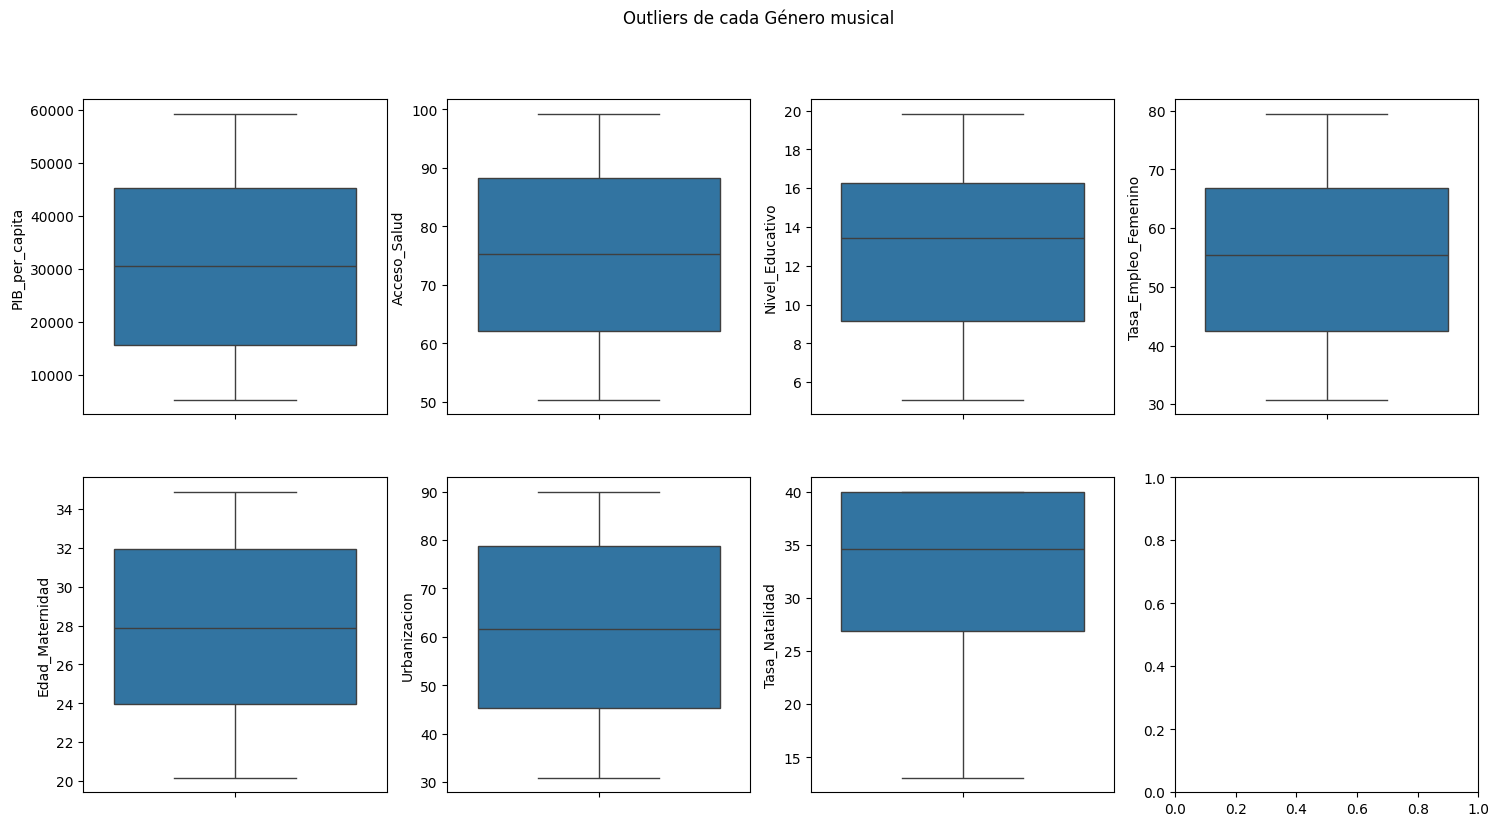

In [3]:
# Outliers por medio de Boxplots

fig,axes=plt.subplots(2,4,figsize=(18,9))
sns.boxplot(df['PIB_per_capita'],ax=axes[0,0])
sns.boxplot(df['Acceso_Salud'],ax=axes[0,1])
sns.boxplot(df['Nivel_Educativo'],ax=axes[0,2])
sns.boxplot(df['Tasa_Empleo_Femenino'],ax=axes[0,3])
sns.boxplot(df['Edad_Maternidad'],ax=axes[1,0])
sns.boxplot(df['Urbanizacion'],ax=axes[1,1])
sns.boxplot(df['Tasa_Natalidad'],ax=axes[1,2])
fig.suptitle('Outliers de cada Género musical')
plt.show()

In [4]:
# Identificación de duplicados

if df.duplicated().any():
    print("Hay duplicados en el DataFrame.")
    df.duplicated.show()
    df.drop_duplicates(inplace=True)
    print("Duplicados eliminados.")
    df.show()
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


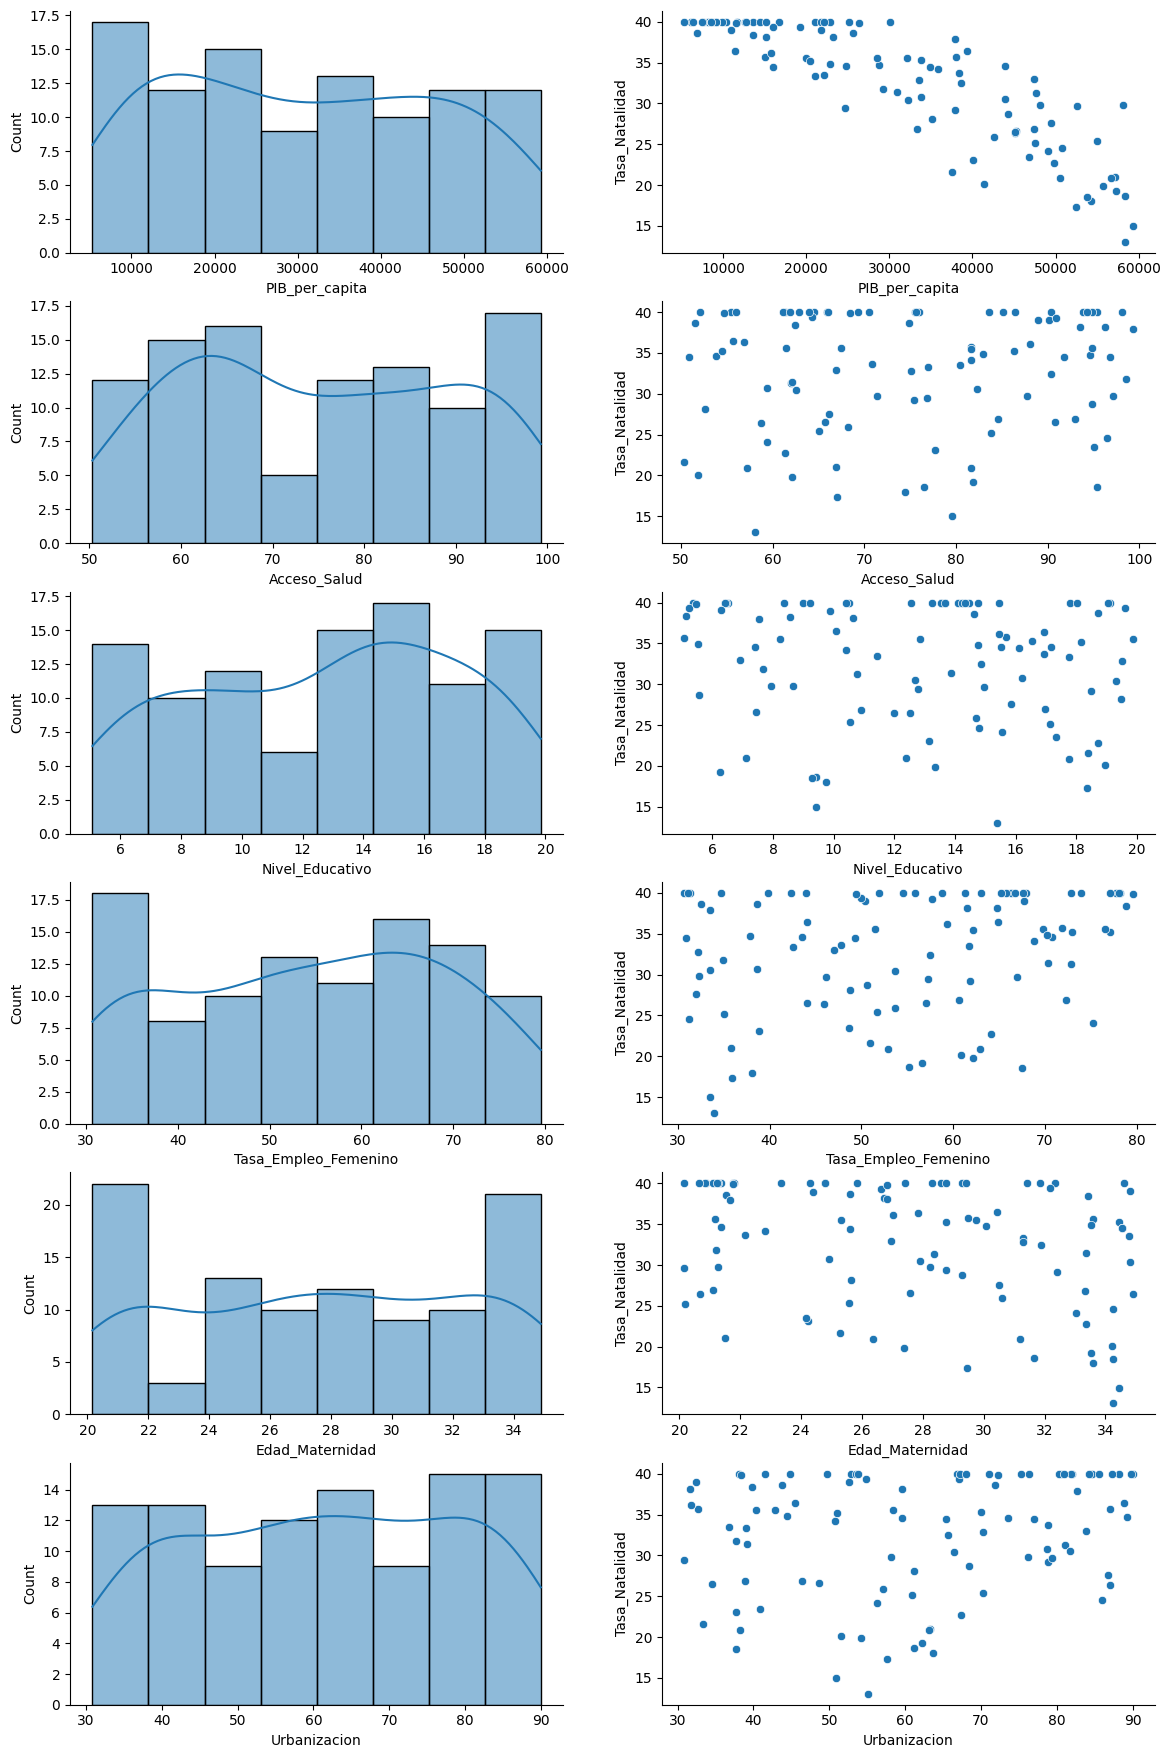

In [5]:
# Distribución de las variables y detección de posibles valores atípicos o tendencias

axes,fig = plt.subplots(6,2,figsize=(14,22))
sns.histplot(data=df, x='PIB_per_capita', ax=fig[0,0], kde=True)
sns.scatterplot(data=df, x='PIB_per_capita', y='Tasa_Natalidad', ax=fig[0,1])
sns.histplot(data=df, x='Acceso_Salud', ax=fig[1,0], kde=True)
sns.scatterplot(data=df, x='Acceso_Salud', y='Tasa_Natalidad', ax=fig[1,1])
sns.histplot(data=df, x='Nivel_Educativo', ax=fig[2,0], kde=True)
sns.scatterplot(data=df, x='Nivel_Educativo', y='Tasa_Natalidad', ax=fig[2,1])
sns.histplot(data=df, x='Tasa_Empleo_Femenino', ax=fig[3,0], kde=True)
sns.scatterplot(data=df, x='Tasa_Empleo_Femenino', y='Tasa_Natalidad', ax=fig[3,1])
sns.histplot(data=df, x='Edad_Maternidad', ax=fig[4,0], kde=True)
sns.scatterplot(data=df, x='Edad_Maternidad', y='Tasa_Natalidad', ax=fig[4,1])
sns.histplot(data=df, x='Urbanizacion', ax=fig[5,0], kde=True)
sns.scatterplot(data=df, x='Urbanizacion', y='Tasa_Natalidad', ax=fig[5,1])
sns.despine()
plt.show()

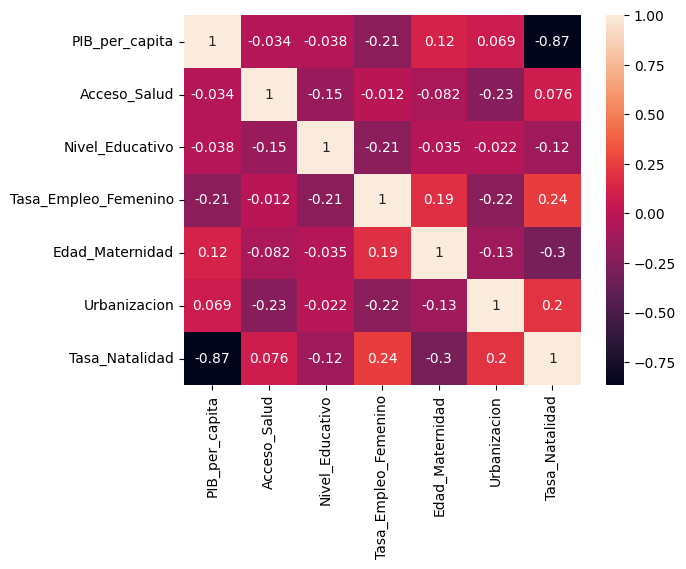

In [6]:
#Heatmap para evaluar posible relación lineal entre variables

corr = df.drop('País', axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [7]:
# Resultados de exploración de data   CAMBIAR
exploracion = f"""
# Exploración de datos

Se revisó el dataset que incluye información socioeconómica como el PIB per cápita, el acceso a servicios de salud, la tasa de educación y otros factores relevantes que permitirán predecir la tasa de natalidad.

Luego de la exploración de los datos se observó lo siguiente:

*   El dataset contiene 100 filas de datos, y recopila información sobre 8 características relevantes sobre el nivel socioeconómico de diferentes países.
*   No existen valores nulos.
*   No existen duplicados en el dataset.
*   El dataset no contiene datos atípicos o outliers.

Además, Considerando el análisis de correlación lineal realizado (Ver Heatmap, y Gráficas de Distribución de cada variable con respecto a la tasa de natalidad), es que se puede destacar lo siguiente:

*   PIB per cápita: Como se observa en la matriz de correlación, existe una fuerte relación negativa con la tasa de natalidad. Esto sugiere que en países con mayor desarrollo económico, la tasa de natalidad tiende a ser menor.
*   Las variables del dataset que presentan una correlación baja son: Tasa_Empleo_Femenino (0.242), 'Edad_Maternidad' (-0.300) y 'Urbanizacion' (0.205), por lo que pueden considerarse como relevantes en este análisis. Tanto la Tasa_Empleo_Femenino como la Urbanización tienen una correlación positiva, es decir la tasa de natalidad aumenta a medida de que estas variables lo hagan. Y en el caso de la Edad_Maternidad la correlación es negativa por lo que a mayor edad de maternidad menor tasa de natalidad.
*   Las variables 'Acceso_Salud' (0.076) y 'Nivel_Educativo' (-0.124), tienen una correlación prácticamente nula, por lo que no afectan la predicción en este caso.

"""

display(Markdown(exploracion))


# Exploración de datos

Se revisó el dataset que incluye información socioeconómica como el PIB per cápita, el acceso a servicios de salud, la tasa de educación y otros factores relevantes que permitirán predecir la tasa de natalidad.

Luego de la exploración de los datos se observó lo siguiente:

*   El dataset contiene 100 filas de datos, y recopila información sobre 8 característica relevantes sobre el nivel socioeconómico de diferentes países.
*   No existen valores nulos.
*   No existen duplicados en el dataset.
*   El dataset no contiene datos atípicos o outliers.

Además, Considerando el análisis de correlacion lineal realizado (Ver Heatmap, y Gráficas de Distribución de cada variable con respecto a la tasa de natalidad), es que se puede destacar lo siguiente:

*   PIB per cápita: Como se observa en la matriz de correlación, existe una fuerte relación negativa con la tasa de natalidad. Esto sugiere que en países con mayor desarrollo económico, la tasa de natalidad tiende a ser menor.
*   Las variables del dataset que presentan una correlación baja son: Tasa_Empleo_Femenino (0.242), 'Edad_Maternidad' (-0.300) y 'Urbanizacion' (0.205), por lo que pueden considerarse como relevantes en este análisis. Tanto la Tasa_Empleo_Femenino como la Urbanizacion tienen una correlacion positiva, es decir la tasa de natalidad aumenta a medida de que estas variables lo hagan. Y en el caso de la Edad_Maternidad la correlacion es negativa por lo que a mayor edad de maternidad menor tasa de natalidad.
*   las variables 'Acceso_Salud' (0.076) y 'Nivel_Educativo' (-0.124), tienen una correlacion practicamente nula, por lo que no afectan la predicción en este caso.




2. Diseño y entrenamiento del modelo (5 puntos)
* Diseña una red neuronal con la siguiente estructura:
    * Capa de entrada con tantas neuronas como variables predictoras.
    * Mínimo de 2 capas ocultas con activaciones adecuadas.
    * Capa de salida con una neurona para predecir la tasa de natalidad.
* Aplica diferentes funciones de activación y evalúa su impacto.
* Utiliza optimizadores adecuados y experimenta con diferentes valores de learning rate.
* Aplica regularización (dropout o L2) para evitar el sobreajuste.
* Entrena el modelo utilizando una función de pérdida adecuada para problemas de regresión.

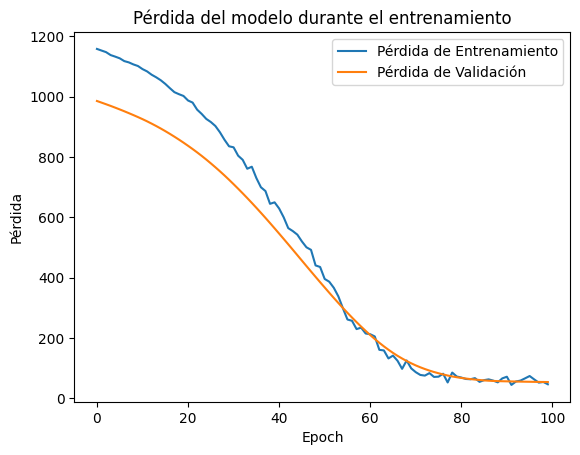

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparar los datos
X = df.drop(['País', 'Tasa_Natalidad'], axis=1)
y = df['Tasa_Natalidad']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Diseñar la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Capa de entrada
    tf.keras.layers.Dense(64, activation='relu'),      # Primera capa oculta con activación ReLU
    tf.keras.layers.Dropout(0.2),                      # Regularización con Dropout
    tf.keras.layers.Dense(32, activation='relu'),      # Segunda capa oculta con activación ReLU
    tf.keras.layers.Dropout(0.2),                      # Regularización con Dropout
    tf.keras.layers.Dense(1)                           # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Visualizar el historial de entrenamiento
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento') # Etiqueta traducida
plt.plot(history.history['val_loss'], label='Pérdida de Validación') # Etiqueta traducida
plt.title('Pérdida del modelo durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

3. Evaluación y optimización del modelo (3 puntos)
* Evalúa el modelo con datos de prueba.
* Ajusta hiperparámetros para mejorar el rendimiento.
* Analiza el impacto de cada variable en la predicción.
* Realiza predicciones con el modelo y compáralas con datos reales.

In [9]:
# Evaluar el modelo con datos de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Loss en los datos de prueba: {loss:.4f}')
print(f'MAE en los datos de prueba: {mae:.4f}')

# Realizar predicciones
predictions = model.predict(X_test)

# Mostrar algunas predicciones y compararlas con los valores reales
print("\nPredicciones vs Valores Reales:")
for i in range(10):
    print(f"Predicción: {predictions[i][0]:.4f}, Real: {y_test.iloc[i]:.4f}")

Loss en los datos de prueba: 39.3431
MAE en los datos de prueba: 5.3698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Predicciones vs Valores Reales:
Predicción: 46.6614, Real: 40.0000
Predicción: 16.2725, Real: 17.9864
Predicción: 27.6791, Real: 25.1752
Predicción: 30.5603, Real: 20.1104
Predicción: 26.8430, Real: 39.3768
Predicción: 32.7680, Real: 31.8052
Predicción: 43.4833, Real: 40.0000
Predicción: 23.3633, Real: 17.3359
Predicción: 32.1799, Real: 40.0000
Predicción: 35.7331, Real: 38.6134


In [10]:
# Instalación de Keras Tuner
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [11]:
# Importación de librerías
import keras_tuner as kt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparar los datos
X = df.drop(['País', 'Tasa_Natalidad'], axis=1)
y = df['Tasa_Natalidad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función definida para construir el modelo creando diferentes versiones de la red neuronal con distintas combinaciones de hiperparámetros.
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Capas ocultas con número de neuronas sintonizable
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=128,
                                            step=32),
                                        activation='relu'))
        # Dropout sintonizable
        model.add(tf.keras.layers.Dropout(hp.Float('dropout_' + str(i),
                                            min_value=0.0,
                                            max_value=0.5,
                                            step=0.1)))


    # Capa de salida
    model.add(tf.keras.layers.Dense(1))

    # Tasa de aprendizaje sintonizable para el optimizador Adam
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

    return model

In [12]:
# Configurar el tuner usando RandomSearch para probar diferentes combinaciones de hiperparámetros aleatoriamente.
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',  # El objetivo es minimizar el MAE en los datos de validación
    max_trials=10,        # Número total de combinaciones de hiperparámetros a probar
    executions_per_trial=2, # Número de modelos a entrenar por cada combinación de hiperparámetros
    directory='my_dir',   # Directorio para guardar los resultados del tuning
    project_name='natalidad_tuning')

# Iniciar la búsqueda de hiperparámetros
tuner.search(X_train, y_train,
             epochs=50,      # Número de épocas para entrenar cada modelo durante el tuning
             validation_split=0.2)

# Obtener los mejores hiperparámetros y el mejor modelo
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print(f"""
La búsqueda de hiperparámetros ha terminado.
Los mejores hiperparámetros encontrados son:
{best_hps.values}
""")

# Evaluar el mejor modelo con los datos de prueba
loss, mae = best_model.evaluate(X_test, y_test, verbose=0)

print(f'Loss del mejor modelo en los datos de prueba: {loss:.4f}')
print(f'MAE del mejor modelo en los datos de prueba: {mae:.4f}')

Trial 10 Complete [00h 00m 19s]
val_mae: 29.985692024230957

Best val_mae So Far: 5.294623374938965
Total elapsed time: 00h 03m 24s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



La búsqueda de hiperparámetros ha terminado.
Los mejores hiperparámetros encontrados son:
{'num_hidden_layers': 2, 'units_0': 128, 'dropout_0': 0.2, 'learning_rate': 0.01, 'units_1': 64, 'dropout_1': 0.2, 'units_2': 64, 'dropout_2': 0.1}

Loss del mejor modelo en los datos de prueba: 33.4940
MAE del mejor modelo en los datos de prueba: 5.0814


4. Análisis de resultados y reflexión final (1 punto)
* Explica qué variables resultaron más influyentes en la predicción de la natalidad.
* Relaciona los resultados con tendencias demográficas globales.
* Propón mejoras o ajustes para futuras versiones del modelo.

In [14]:
from IPython.display import display, Markdown

resultados = f"""
# Análisis de resultados y reflexión final


Basándose en la exploración de datos, el diseño del modelo, su entrenamiento y optimización, se pueden extraer las siguientes conclusiones:


## Variables más influyentes


Considerando tanto el análisis de correlación lineal inicial como el rendimiento del modelo entrenado y optimizado, las variables que parecen tener una mayor influencia en la predicción de la tasa de natalidad son:


*   **PIB per cápita:** Como observamos en la matriz de correlación, existe una fuerte relación negativa con la tasa de natalidad. Esto sugiere que en países con mayor desarrollo económico, la tasa de natalidad tiende a ser menor.
*   Otras variables del dataset que presentan una correlación baja, son **Tasa_Empleo_Femenino (0.242)**, **'Edad_Maternidad' (-0.300)** y **'Urbanizacion' (0.205)**. Tanto la Tasa_Empleo_Femenino como la Urbanización tienen una correlación positiva, es decir la tasa de natalidad aumenta a medida de que estas variables lo hagan. Y en el caso de la Edad_Maternidad la correlación es negativa por lo que a mayor edad de maternidad menor tasa de natalidad.


Las variables 'Acceso_Salud' (0.076) y 'Nivel_Educativo' (-0.124), tienen una correlación prácticamente nula, por lo que no afectan la predicción en este caso.


Es importante recordar que la red neuronal puede haber identificado relaciones no lineales entre las variables que no son evidentes en un simple análisis de correlación lineal.


## Relación con tendencias demográficas globales


Los hallazgos parecen alinearse con algunas tendencias demográficas globales conocidas, como la transición demográfica, donde las tasas de natalidad tienden a disminuir a medida que los países se desarrollan socioeconómicamente. Por lo que países con un PIB per cápita más alto, mayor tasa de empleo femenino y urbanización tienden a tener una tasa de natalidad más baja.


## Propuestas de mejora y ajustes futuros


Para futuras iteraciones de este modelo, se podrían considerar las siguientes mejoras:


*   **Explorar más a fondo la influencia de variables:** Aunque la correlación lineal da una pista, se podrían emplear otras técnicas para entender mejor cómo cada variable impacta la predicción en el modelo no lineal.
*   **Probar arquitecturas de red neuronal más complejas:** Experimentar con un mayor número de capas, diferentes tipos de capas (aunque para este problema de regresión simple, capas densas son apropiadas) o un mayor rango de unidades en las capas ocultas durante la sintonización de hiperparámetros.
*   **Optimizar aún más los hiperparámetros:** Ejecutar Keras Tuner por más `max_trials` o `executions_per_trial`, o probar otros tuners como `BayesianOptimization`.
*   **Considerar la inclusión de más datos:** Un dataset más amplio y diverso podría mejorar la capacidad de generalización del modelo.


Este ejercicio ha permitido diseñar, entrenar y evaluar un modelo de red neuronal para predecir la tasa de natalidad, así como reflexionar sobre la importancia de distintos factores socioeconómicos en este fenómeno.

"""
display(Markdown(resultados))


# Análisis de resultados y reflexión final

Basándose en la exploración de datos, el diseño del modelo, su entrenamiento y optimización, se pueden extraer las siguientes conclusiones:

## Variables más influyentes

Considerando tanto el análisis de correlación lineal inicial como el rendimiento del modelo entrenado y optimizado, las variables que parecen tener una mayor influencia en la predicción de la tasa de natalidad son:

*   **PIB per cápita:** Como observamos en la matriz de correlación, existe una fuerte relación negativa con la tasa de natalidad. Esto sugiere que en países con mayor desarrollo económico, la tasa de natalidad tiende a ser menor.
*   Otras variables del dataset que presentan una correlación baja, son **Tasa_Empleo_Femenino (0.242)**, **'Edad_Maternidad' (-0.300)** y **'Urbanizacion' (0.205)**. Tanto la Tasa_Empleo_Femenino como la Urbanización tienen una correlación positiva, es decir la tasa de natalidad aumenta a medida de que estas variables lo hagan. Y en el caso de la Edad_Maternidad la correlación es negativa por lo que a mayor edad de maternidad menor tasa de natalidad.

Las variables 'Acceso_Salud' (0.076) y 'Nivel_Educativo' (-0.124), tienen una correlación prácticamente nula, por lo que no afectan la predicción en este caso.

Es importante recordar que la red neuronal puede haber identificado relaciones no lineales entre las variables que no son evidentes en un simple análisis de correlación lineal.

## Relación con tendencias demográficas globales

Los hallazgos parecen alinearse con algunas tendencias demográficas globales conocidas, como la transición demográfica, donde las tasas de natalidad tienden a disminuir a medida que los países se desarrollan socioeconómicamente. Por lo que paises con un PIB per cápita más alto, mayor tasa de empleo femenino y urbanizacion tienden a tener una tasa de natalidad más baja.

## Propuestas de mejora y ajustes futuros

Para futuras iteraciones de este modelo, se podrían considerar las siguientes mejoras:

*   **Explorar más a fondo la influencia de variables:** Aunque la correlación lineal da una pista, se podrían emplear otras técnicas para entender mejor cómo cada variable impacta la predicción en el modelo no lineal.
*   **Probar arquitecturas de red neuronal más complejas:** Experimentar con un mayor número de capas, diferentes tipos de capas (aunque para este problema de regresión simple, capas densas son apropiadas) o un mayor rango de unidades en las capas ocultas durante la sintonización de hiperparámetros.
*   **Optimizar aún más los hiperparámetros:** Ejecutar Keras Tuner por más `max_trials` o `executions_per_trial`, o probar otros tuners como `BayesianOptimization`.
*   **Considerar la inclusión de más datos:** Un dataset más amplio y diverso podría mejorar la capacidad de generalización del modelo.

Este ejercicio ha permitido diseñar, entrenar y evaluar un modelo de red neuronal para predecir la tasa de natalidad, así como reflexionar sobre la importancia de distintos factores socioeconómicos en este fenómeno.


###INSTRUCCIONES ADICIONALES:
* Puntos totales: 10 puntos.
* Descarga el dataset proporcionado.
* Incluye un código comentado con tu implementación.
* Comprime tu proyecto en un archivo .zip o .rar.
* Adjunta un documento con las reflexiones analíticas.
* Sube tu entrega a la plataforma.